Rahmanda Afebrio Yuris Soesatyo - 1103223024 / Midterm-Deep Learning-Clustering

Data preparation

In [1]:
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}


Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Download complete. You can list the files in the current directory to see the downloaded content.


C:\College\Deep Learning\Midterm\.venv\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: c:\College\Deep Learning\Midterm\Machine Learning\clusteringmidterm.csv

  0%|          | 0.00/1.01M [00:00<?, ?B/s]
 52%|█████▏    | 524k/1.01M [00:00<00:00, 2.20MB/s]
100%|██████████| 1.01M/1.01M [00:00<00:00, 3.38MB/s]
Download completed


Import module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv('clusteringmidterm.csv')
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.shape

(8950, 18)

Pengecekan nilai kosong

In [9]:
df.isna().sum()
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
df = df.drop(columns=["CUST_ID"])
#di drop karena tidak berpengaruh pada clustering

In [13]:
df = df.fillna(df.median())
#mengisi missing value dengan median dari masing-masing kolom

In [14]:
#scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
     

Training model - Functional

In [15]:
input_dim = X_scaled.shape[1]
latent_dim = 10  # bebas, tapi 8–16 biasanya ideal

input_layer = layers.Input(shape=(input_dim,))
e = layers.Dense(64, activation='relu')(input_layer)
e = layers.Dense(32, activation='relu')(e)
latent = layers.Dense(latent_dim, activation='relu')(e)

d = layers.Dense(32, activation='relu')(latent)
d = layers.Dense(64, activation='relu')(d)
output_layer = layers.Dense(input_dim)(d)

autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
encoder = models.Model(inputs=input_layer, outputs=latent)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 17)             │         1,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,131 (27.86 KB)

 Trainable params: 7,131 (27.86 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=256,
    verbose=1
)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8895  
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4848 
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3216 
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2493 
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1940 
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1546 
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1250 
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1027
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0867 
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0768 
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0681 
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0614 
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0568 
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0529 
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0494 
Epoc

In [17]:
latent_repr = encoder.predict(X_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step


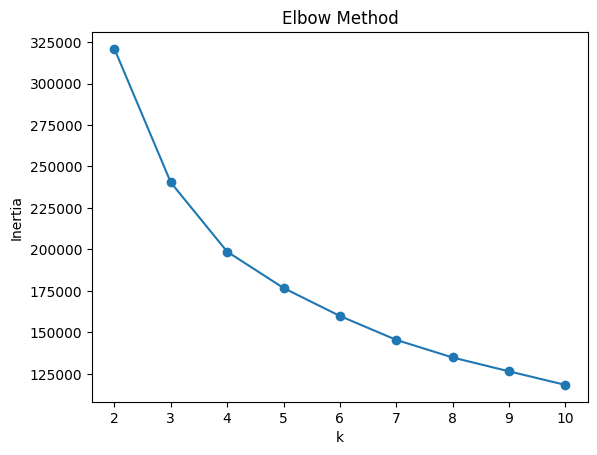

In [18]:
inertias = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(latent_repr)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [19]:
k = 4
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(latent_repr)
cluster_centers = kmeans.cluster_centers_

In [20]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    print(k, round(silhouette_score(X_scaled, labels), 4))

2 0.2795
3 0.2067
4 0.1665
5 0.1926
6 0.1923
7 0.2153
8 0.2036
9 0.2038


In [21]:
def soft_assignment(z):
    q = 1.0 / (1.0 + tf.reduce_sum(tf.square(tf.expand_dims(z, axis=1) - cluster_centers), axis=2))
    q = q ** ((1 + 1) / 2)  # student t-distribution, alpha = 1
    q = q / tf.reduce_sum(q, axis=1, keepdims=True)
    return q


def target_distribution(q):
    weight = q ** 2 / tf.reduce_sum(q, axis=0)
    p = weight / tf.reduce_sum(weight, axis=1, keepdims=True)
    return p

optimizer = tf.keras.optimizers.Adam()
max_iter = 3000
update_interval = 100
batch_size = 256

# precompute z & q
z = encoder(X_scaled)
q = soft_assignment(z)
p = target_distribution(q)

for ite in range(max_iter):

    with tf.GradientTape() as tape:
        z = encoder(X_scaled)
        q = soft_assignment(z)
        loss = tf.reduce_mean(tf.keras.losses.KLDivergence()(p, q))

    grads = tape.gradient(loss, encoder.trainable_weights)

    # SKIP iterasi kalau semuanya None (prevent crash)
    if all(g is None for g in grads):
        print(f"[WARN] Iter {ite}: No gradients, skipping update.")
        continue

    optimizer.apply_gradients(zip(grads, encoder.trainable_weights))

    if ite % update_interval == 0:
        p = target_distribution(q)

    if ite % 300 == 0:
        print(f"Iter {ite} - KL Loss: {loss.numpy():.4f}")

Iter 0 - KL Loss: 0.0865
Iter 300 - KL Loss: 0.0584
Iter 600 - KL Loss: 0.0579
Iter 900 - KL Loss: 0.0586
Iter 1200 - KL Loss: 0.0586
Iter 1500 - KL Loss: 0.0586
Iter 1800 - KL Loss: 0.0581
Iter 2100 - KL Loss: 0.0564
Iter 2400 - KL Loss: 0.0530
Iter 2700 - KL Loss: 0.0498


In [22]:
final_z = encoder.predict(X_scaled)
final_q = soft_assignment(final_z)
final_clusters = np.argmax(final_q, axis=1)

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step


Evalusi dan visualisasi hasil

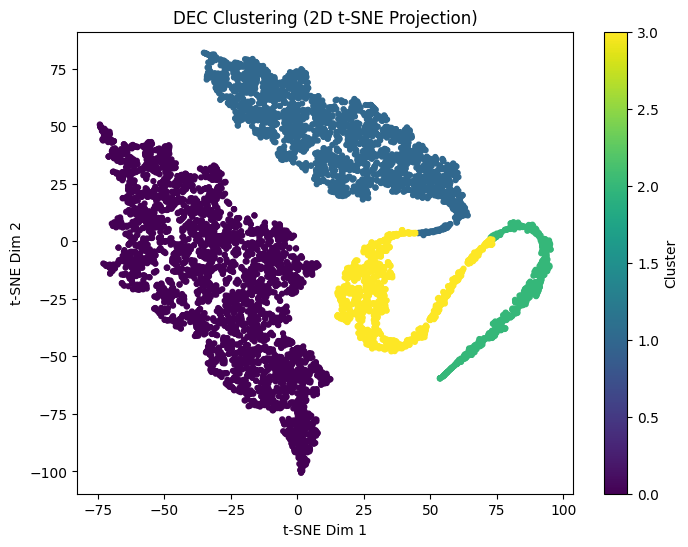

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Ambil latent space (final_z), cluster assignment (final_clusters)
# final_z = encoder.predict(X_scaled)
# final_q = soft_assignment(final_z)
# final_clusters = np.argmax(final_q, axis=1)

# --- 2D projection ---
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
z_2d = tsne.fit_transform(final_z)

# --- plot ---
plt.figure(figsize=(8,6))
scatter = plt.scatter(z_2d[:,0], z_2d[:,1], c=final_clusters, cmap='viridis', s=12)
plt.colorbar(scatter, label="Cluster")
plt.title("DEC Clustering (2D t-SNE Projection)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()


In [24]:
feature_names = df.columns
cluster_df = pd.DataFrame(X_scaled, columns=feature_names)
cluster_df['cluster'] = final_clusters

cluster_summary = cluster_df.groupby('cluster').mean()
cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,-0.198441,0.365187,-0.258912,-0.235654,-0.179212,-0.300320,-0.091151,-0.287969,-0.017031,-0.219153,-0.232450,-0.236712,-0.275925,-0.292182,-0.125758,-0.186702,0.310380
1,-0.163750,-0.596572,-0.139095,-0.125766,-0.097805,-0.052619,-0.040569,0.008741,-0.092309,0.022031,-0.028461,-0.158170,-0.050450,-0.144901,-0.111543,0.156324,-0.246916
2,1.318426,0.384980,2.022261,1.786353,1.499814,1.230605,0.716158,1.195776,0.646946,0.535302,0.922408,1.971149,1.305681,1.924385,0.982668,0.249107,0.042125
3,0.424285,-0.199105,0.214742,0.222928,0.097934,0.598970,0.053607,0.426870,-0.069576,0.492085,0.451151,0.202729,0.460287,0.408116,0.207282,0.208714,-0.624934
